# Predicting Song Popularity - Project 2021 - Python

#### Nguyen Hai Vy, Bertin Alexandre, Hoang Van Hao, Benzitouni Fethi,

##  Load and visualize data

Import some important libraries and load the file

In [198]:
import pandas as pd
import numpy as np
import copy
import random
import itertools
%matplotlib inline
import matplotlib.pyplot as plt
import time
path=""
spotify=pd.read_csv(path+"spotify-extr.txt",sep=" ",header=0)
# Vérification du contenu
spotify.head()

,valence,year,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,pop.class
161704,0.647,1975,0.4490,0.376,298840,0.827,0.007880,B,0.466,-7.604,1,25,0.3990,170.475,C
168077,0.150,2008,0.8990,0.508,236800,0.169,0.000011,Ab,0.136,-11.332,1,42,0.0553,107.477,B
35922,0.423,2007,0.0185,0.470,301093,0.878,0.083900,B,0.276,-5.576,0,65,0.0377,150.093,A
135823,0.302,1995,0.0384,0.176,142200,0.980,0.552000,B,0.237,-3.154,1,36,0.0721,172.566,C
165395,0.828,1994,0.5310,0.705,187800,0.625,0.000008,G,0.348,-11.963,0,38,0.0639,97.831,C


We have 15 columns and 10000 individuals. There is no null-value in this Data.

In [202]:
spotify.shape

(10000, 15)

Change mode and year 

In [203]:
spotify["mode"]=pd.Categorical(spotify["mode"],ordered=False)
spotify['year']=spotify['year'].map(lambda x:float(x))

We show the histograms of 11 quantitative variables

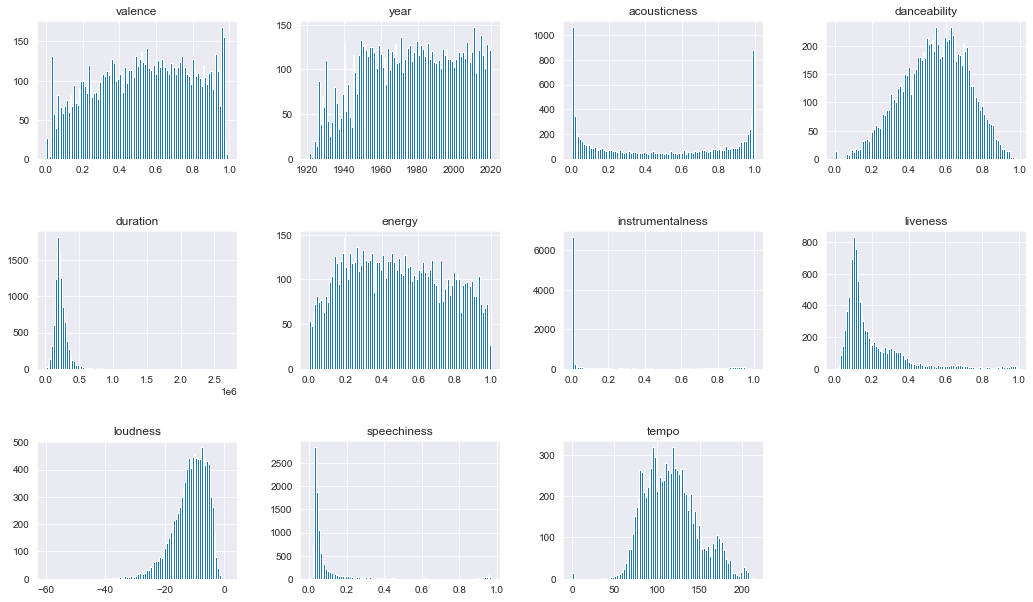

In [204]:
plt.figure(figsize=(15,9))
for (i,j) in zip(['valence','year','acousticness','danceability',
          'duration','energy','instrumentalness','liveness','loudness','speechiness','tempo'],range(12)):
    plt.subplot(3,4,j+1)
    spotify[i].hist(bins=100)
    plt.title(i)
plt.tight_layout(pad=3.0)
plt.show()

We show the boxplots of 11 quantitative variables

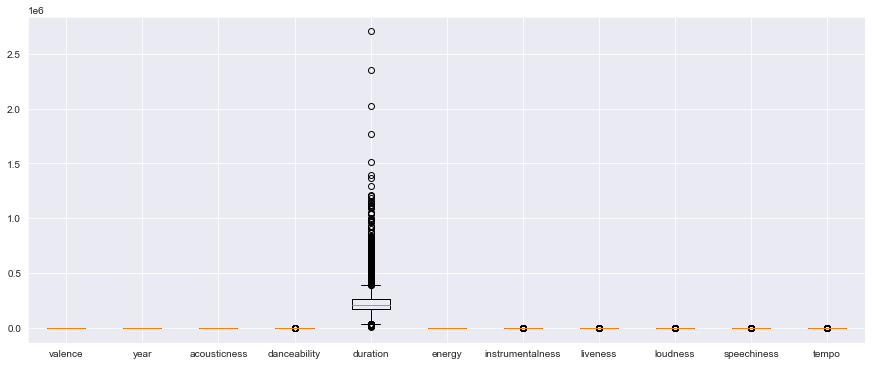

In [205]:
plt.figure(figsize=(15,6))
plt.boxplot(spotify[['valence','year','acousticness','danceability','duration','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo']],labels=['valence','year','acousticness','danceability','duration','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo'])
plt.show()

We show the boxplots of 11 quantitative variables after normalizing

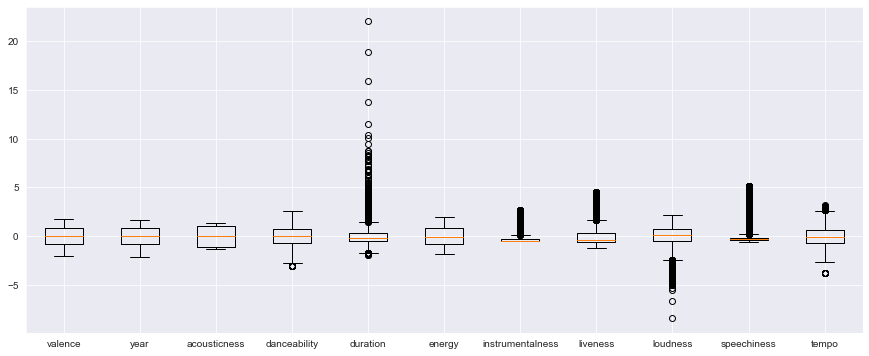

In [209]:
from sklearn.preprocessing import scale
# réduction des variables
X=scale(spotify[['valence','year','acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo']])
plt.figure(figsize=(15,6))
plt.boxplot(X,labels=['valence','year','acousticness','danceability','duration','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo'])
plt.show()

Use seaborn package to have the best data visualizations and to dectect the outlier

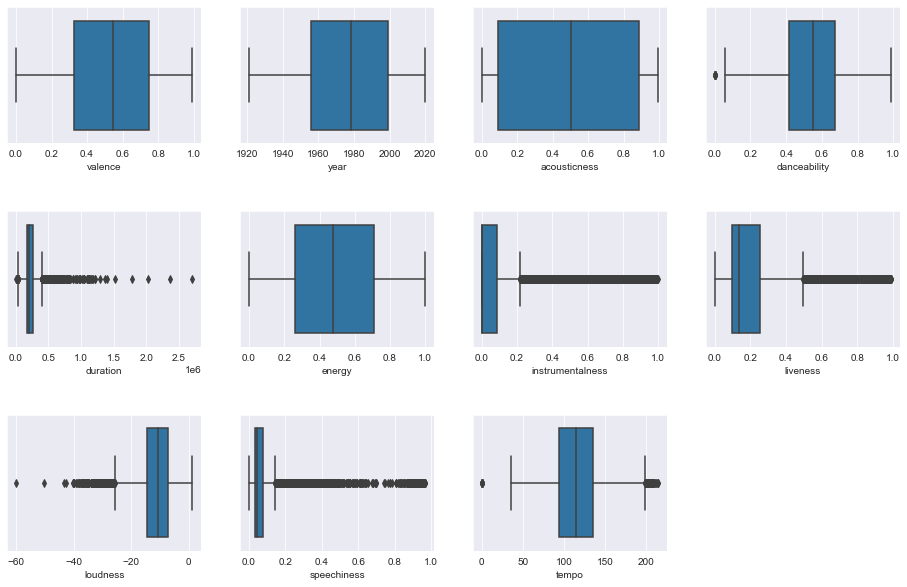

In [210]:
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16, 10))
plt.subplots_adjust(hspace=.5)
list_quanti=['valence','year','acousticness','danceability','duration','energy','instrumentalness',
                        'liveness','loudness','speechiness','tempo']
for i,column in enumerate(list_quanti):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(spotify[column])

plt.show()

We display the scatterplot matrix and correlation matrix of all quantitative variables

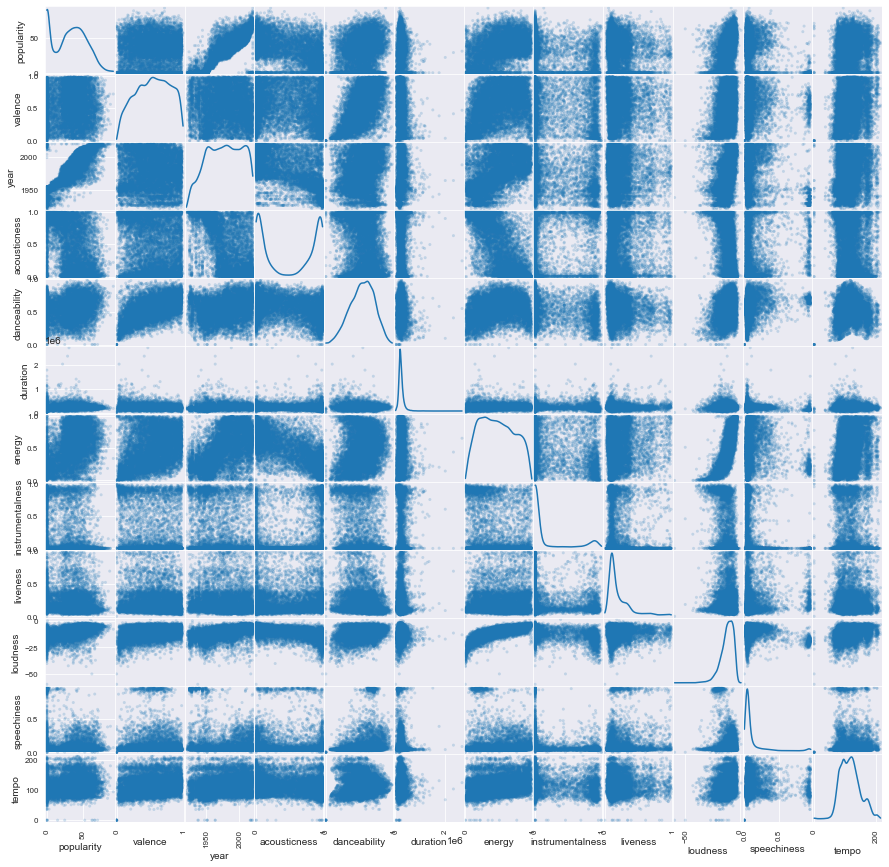

In [211]:
from pandas.plotting import scatter_matrix
scatter_matrix(spotify[['popularity','valence','year','acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo']], alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

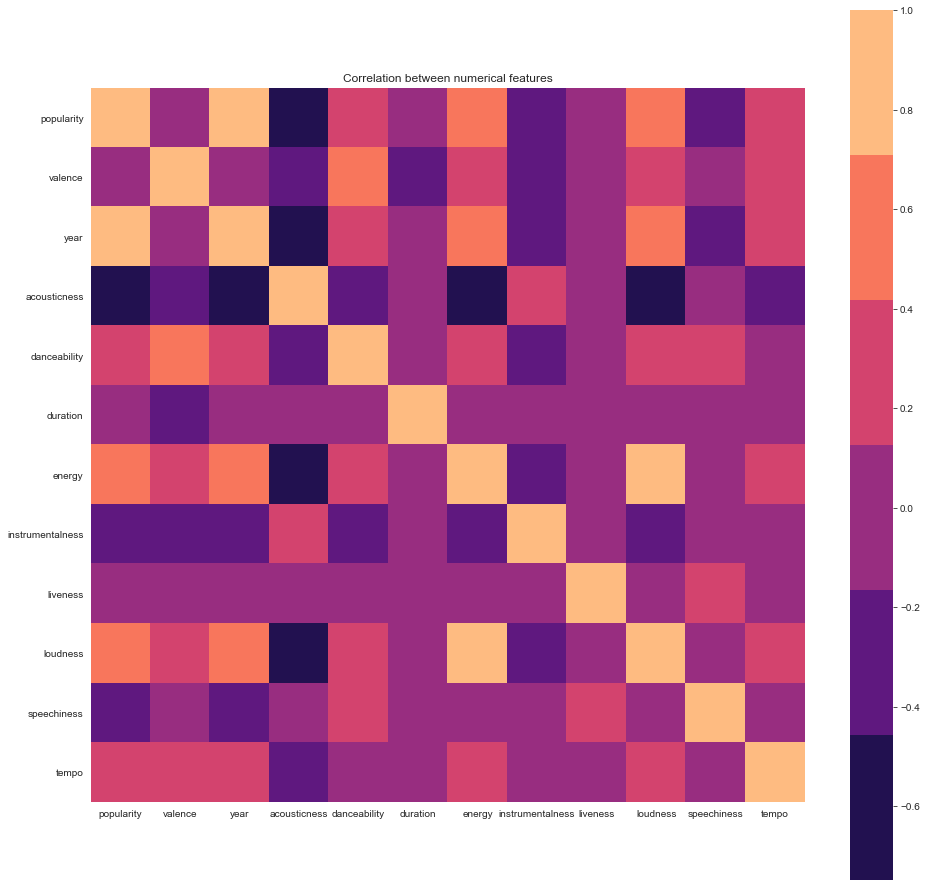

In [212]:
import seaborn as sns
numeric_columns = ['popularity','valence','year','acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo']
numeric_df = pd.DataFrame(data=spotify, columns=numeric_columns, index=spotify.index)
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(16, 16))
cmap = sns.color_palette("magma")
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation between numerical features')
plt.show()

In [213]:
corr = spotify[['popularity','valence','year','acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo']].corr()
corr.style.background_gradient(cmap='coolwarm')

,popularity,valence,year,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo
popularity,1.000000,0.020718,0.858713,-0.575481,0.189825,0.094376,0.496238,-0.301669,-0.072990,0.463429,-0.181803,0.137564
valence,0.020718,1.000000,-0.023340,-0.181083,0.555041,-0.191517,0.342157,-0.198932,-0.004654,0.310310,0.036828,0.173929
year,0.858713,-0.023340,1.000000,-0.616553,0.179617,0.111818,0.538514,-0.280544,-0.057493,0.493609,-0.174748,0.144061
acousticness,-0.575481,-0.181083,-0.616553,1.000000,-0.263299,-0.111250,-0.748026,0.329291,-0.005874,-0.558335,-0.050379,-0.219269
danceability,0.189825,0.555041,0.179617,-0.263299,1.000000,-0.126671,0.203770,-0.275780,-0.110652,0.268976,0.232992,-0.006666
duration,0.094376,-0.191517,0.111818,-0.111250,-0.126671,1.000000,0.071089,0.072081,0.017510,0.025394,-0.093039,-0.012644
energy,0.496238,0.342157,0.538514,-0.748026,0.203770,0.071089,1.000000,-0.283470,0.110493,0.780850,-0.071797,0.265279
instrumentalness,-0.301669,-0.198932,-0.280544,0.329291,-0.275780,0.072081,-0.283470,1.000000,-0.049330,-0.409723,-0.124284,-0.115439
liveness,-0.072990,-0.004654,-0.057493,-0.005874,-0.110652,0.017510,0.110493,-0.049330,1.000000,0.044706,0.155242,0.001253
loudness,0.463429,0.310310,0.493609,-0.558335,0.268976,0.025394,0.780850,-0.409723,0.044706,1.000000,-0.149928,0.226768


### [Analyse en composantes principales](http://wikistat.fr/pdf/st-m-explo-acp.pdf)

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(spotify[['valence','year','acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo']])

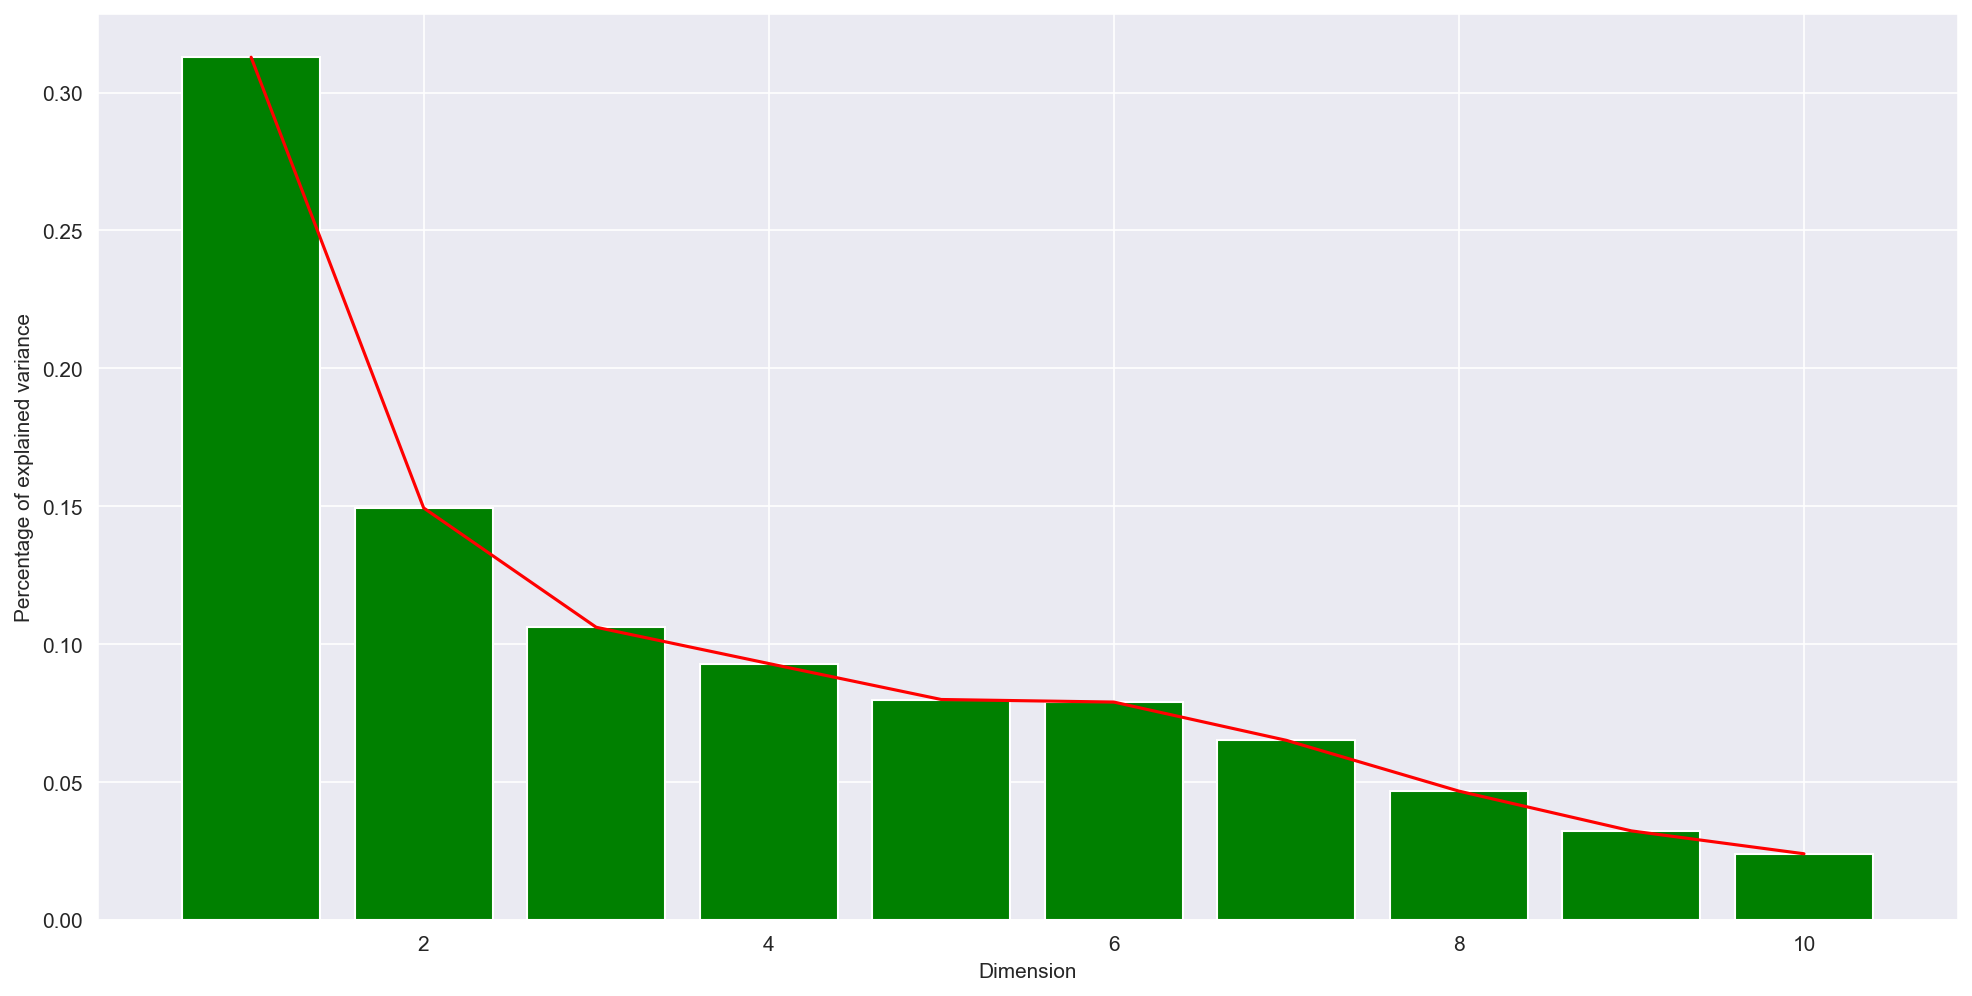

In [21]:
n=10
pca = PCA()
fig = plt.figure(figsize=(16, 8), dpi=150)
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(np.arange(1,n+1),pca.explained_variance_ratio_[:n],color='red')
plt.bar(np.arange(1,n+1),pca.explained_variance_ratio_[:n],color='green')
plt.ylabel("Percentage of explained variance")
plt.xlabel("Dimension")
plt.show()

<Figure size 1080x432 with 0 Axes>

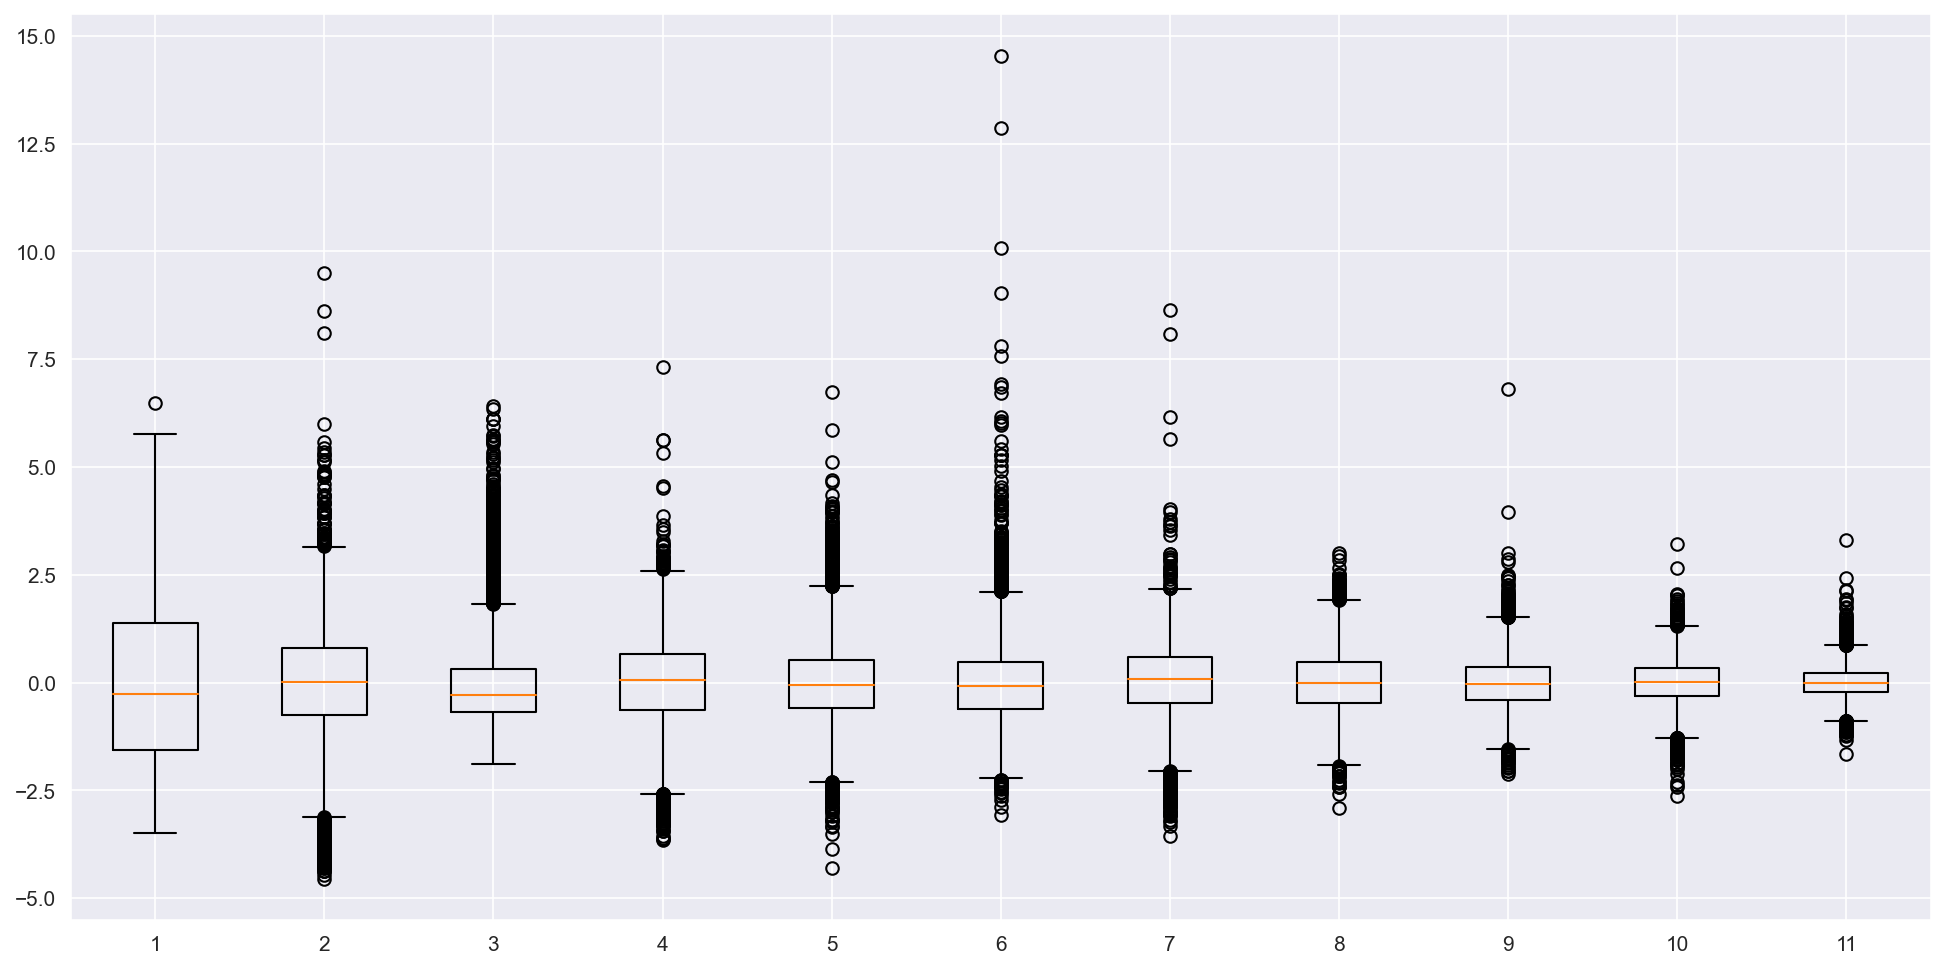

In [22]:
plt.figure(figsize=(15,6))
fig = plt.figure(figsize=(16, 8), dpi=150)
plt.boxplot(C[:,0:11])
plt.show()

Change class (qualitative) into grade (quantitative)

In [240]:
def fonction2(x):
    if x=='A':
        return 1
    elif x=='B':
        return 2
    elif x=='C':
        return 3
    return 4

In [241]:
spotify["pop.grade"]=spotify["pop.class"].map(fonction2)

In [242]:
classe = {1 : "A",
2 : "B",
3 : "C",
4 : "D"}
labels= classe.values()

In [243]:
def plot_pca(X_R, ytrain, fig, ax, nbc, nbc2, label_dic=classe, cmaps = plt.get_cmap("Accent")
):
    for i in range(4):
        xs = X_R[ytrain==i+1,nbc-1]
        ys = X_R[ytrain==i+1, nbc2-1]
        label = label_dic[i+1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=10, label=label)
        ax.set_xlabel("PC%d : %.2f %%" %(nbc,pca.explained_variance_ratio_[nbc-1]*100), fontsize=15)
        ax.set_ylabel("PC%d : %.2f %%" %(nbc2,pca.explained_variance_ratio_[nbc2-1]*100), fontsize=15)

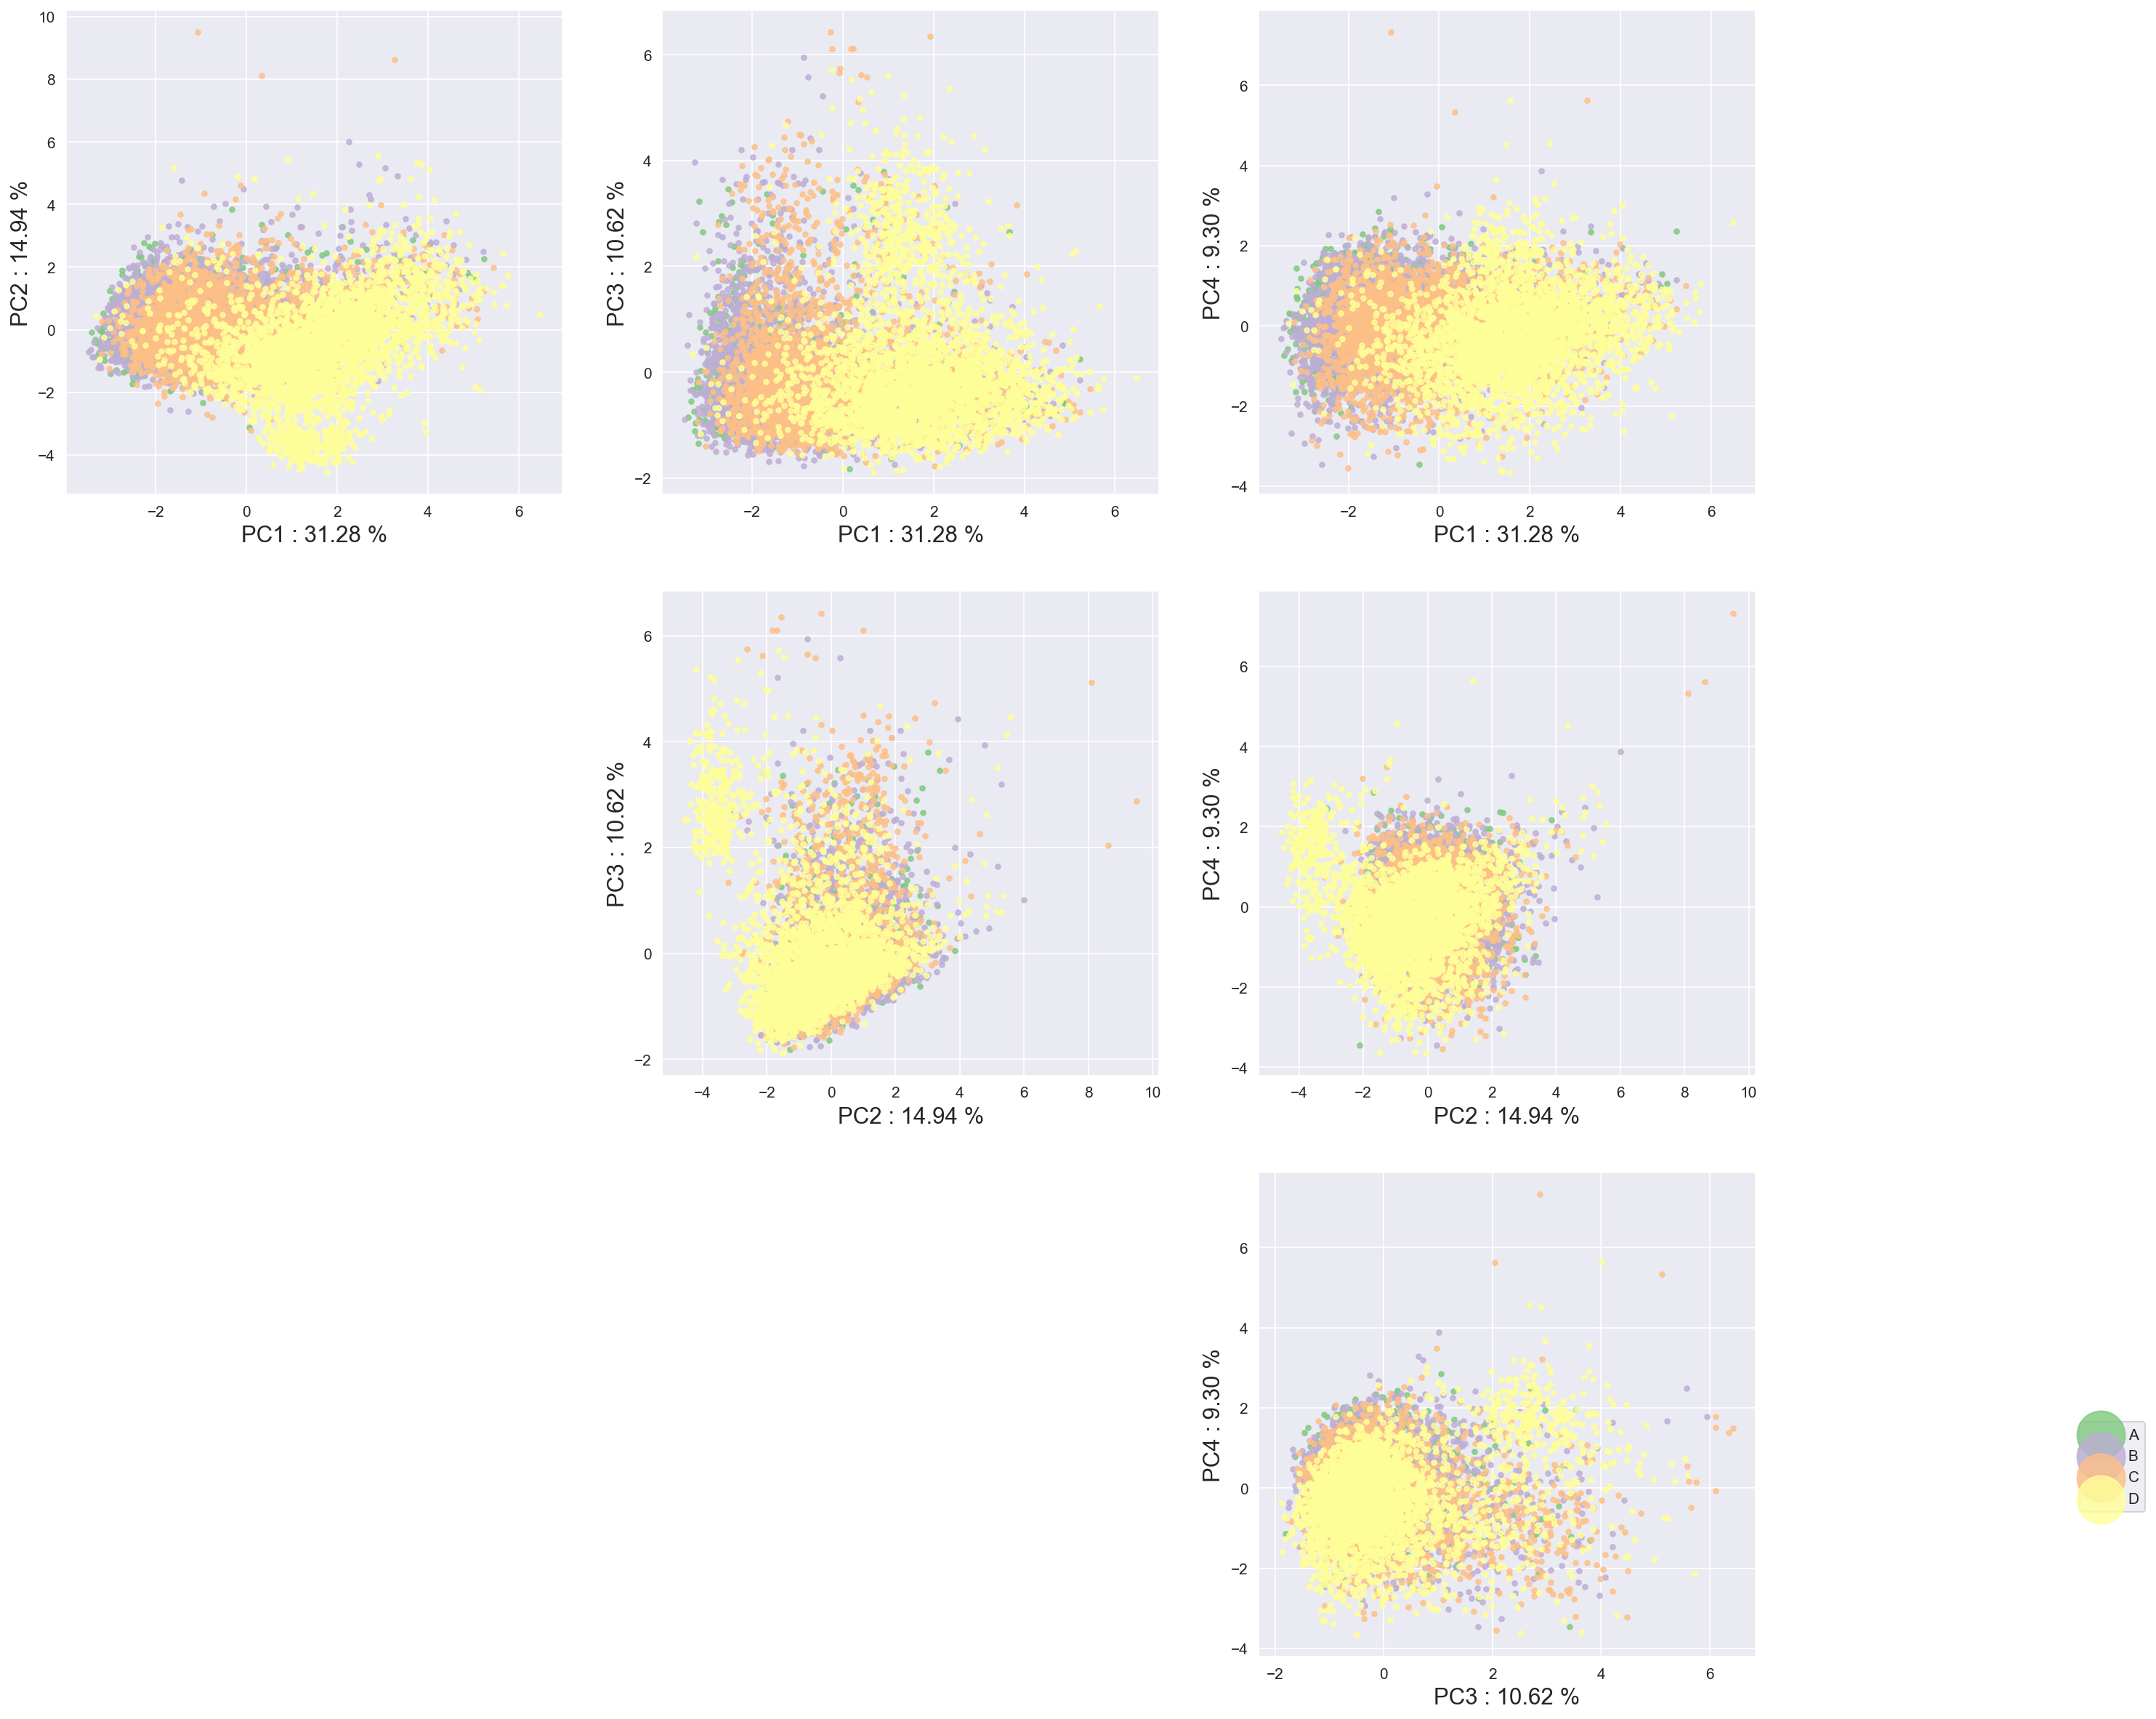

In [244]:
cmaps = plt.get_cmap("Accent")
fig = plt.figure(figsize=(20, 20), dpi=150)
count = 0
for nbc, nbc2,count in [(1, 2, 1), (1, 3, 2), (1, 4, 3), (2, 3, 5), (2, 4, 6), (3, 4, 9)] :
    ax = fig.add_subplot(3, 3, count)
    plot_pca(C, spotify['pop.grade'], fig, ax, nbc, nbc2)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.5), markerscale = 10)
plt.show()

Variable factor map on Dim2-Dim3 and Dim1-Dim2

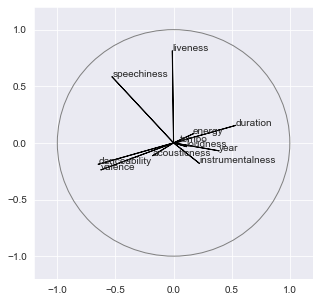

In [245]:
coord1=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, spotify[['valence','year','acousticness','danceability','duration',
                            'energy','instrumentalness','liveness','loudness','speechiness','tempo']].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

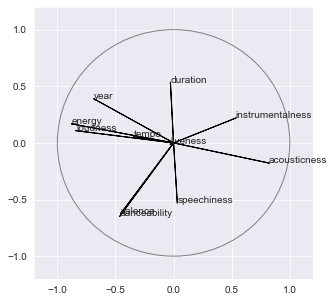

In [246]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, spotify[['valence','year','acousticness','danceability','duration',
                            'energy','instrumentalness','liveness','loudness','speechiness','tempo']].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

One categorical variable has n values. We convert it into n-1 variables.

In [247]:
# Variables explicatives
spotifyDum=pd.get_dummies(spotify[["mode","key"]])
del spotifyDum["mode_0"]
spotifyQuant=spotify[['valence','year','acousticness','danceability','duration',
                 'energy','instrumentalness','liveness','loudness','speechiness','tempo']]
dfC=pd.concat([spotifyDum,spotifyQuant],axis=1)
dfC.head()

,mode_1,key_A,key_Ab,key_B,key_Bb,key_C,key_D,key_Db,key_E,key_Eb,...,year,acousticness,danceability,duration,energy,instrumentalness,liveness,loudness,speechiness,tempo
161704,1,0,0,1,0,0,0,0,0,0,...,1975.0,0.4490,0.376,298840,0.827,0.007880,0.466,-7.604,0.3990,170.475
168077,1,0,1,0,0,0,0,0,0,0,...,2008.0,0.8990,0.508,236800,0.169,0.000011,0.136,-11.332,0.0553,107.477
35922,0,0,0,1,0,0,0,0,0,0,...,2007.0,0.0185,0.470,301093,0.878,0.083900,0.276,-5.576,0.0377,150.093
135823,1,0,0,1,0,0,0,0,0,0,...,1995.0,0.0384,0.176,142200,0.980,0.552000,0.237,-3.154,0.0721,172.566
165395,0,0,0,0,0,0,0,0,0,0,...,1994.0,0.5310,0.705,187800,0.625,0.000008,0.348,-11.963,0.0639,97.831


In [248]:
# variable à expliquer qualitative
Yb=spotify["pop.grade"]
# variable à expliquer réelle
Yr=spotify["popularity"].map(lambda x: float(x))

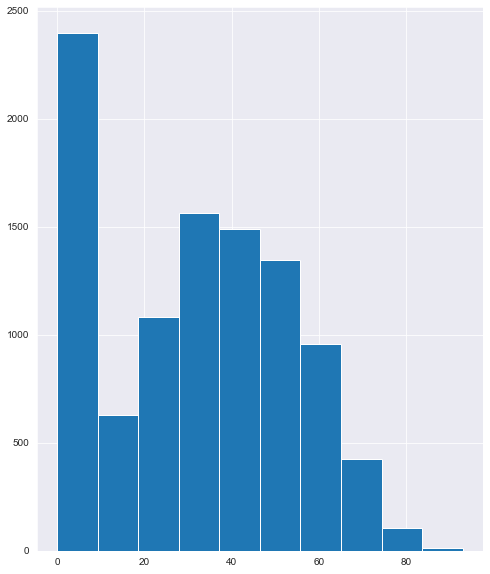

In [249]:
Yr.hist()
plt.show()

### Data split

In [250]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Yb_train,Yb_test=train_test_split(dfC,Yb,test_size=2000,random_state=11)
X_train,X_test,Yr_train,Yr_test=train_test_split(dfC,Yr,test_size=2000,random_state=11)

In [253]:
def classfunction(y):
    for i in range(len(y)):
        if y[i]<20:
            y[i]=4
        elif y[i]<40:
            y[i]=3
        elif y[i]<60:
            y[i]=2
        else:
            y[i]=1

### Regression lineaire

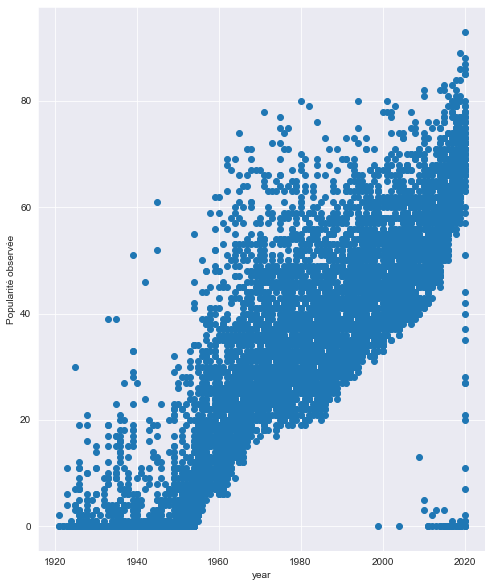

In [254]:
plt.plot(X_train["year"],Yr_train,"o")
plt.xlabel("year")
plt.ylabel("Popularité observée")
plt.show()

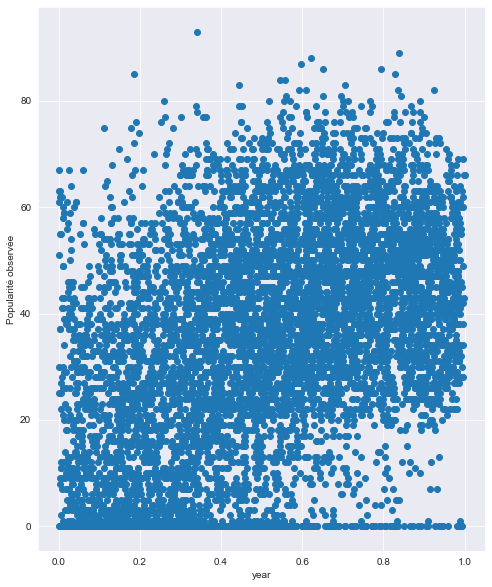

In [255]:
plt.plot(X_train["energy"],Yr_train,"o")
plt.xlabel("year")
plt.ylabel("Popularité observée")
plt.show()

In [256]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score
regLinear = linear_model.LinearRegression()
regLinear.fit(Xr_train,Yr_train)
prev=regLinear.predict(Xr_test)

In [257]:
from sklearn.metrics import r2_score,f1_score
print("R2 on the train set",r2_score(Yr_train,regLinear.predict(Xr_train)))
print("R2 on the test set",r2_score(Yr_test,prev))

R2 on the train set 0.7488405883818183
R2 on the test set 0.7430722783397741


In [258]:
prev_on_train_set=regLinear.predict(Xr_train)
classfunction(prev_on_train_set)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))

Score on the test set: 0.714375


In [259]:
classfunction(prev)
score=accuracy_score(prev,Yb_test)
print("Score on the test set: %f" %(score))
pd.DataFrame(confusion_matrix(prev,Yb_test), index = labels, columns=labels)


Score on the test set: 0.715500


,A,B,C,D
A,51,15,0,2
B,115,410,136,10
C,23,138,392,71
D,1,9,49,578


In [262]:
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(prev,Yb_test, average='macro')))

F1_Score on the test set: 0.649608


#### Lasso penality Optimization

In [263]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs du paramètre alpha à optimiser
param=[{"alpha":[0.05,0.1,0.2,0.3,0.4,0.5,1]}]
regLasso = GridSearchCV(linear_model.Lasso(), param,cv=5,n_jobs=-1)
regLassOpt=regLasso.fit(Xr_train, Yr_train)
# paramètre optimal
regLassOpt.best_params_["alpha"]
print("Meilleur R2 = %f, Meilleur paramètre = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Meilleur R2 = 0.747375, Meilleur paramètre = {'alpha': 0.1}


In [268]:
prev=regLassOpt.predict(Xr_test)

In [269]:
prev_on_train_set=regLassOpt.predict(Xr_train)
classfunction(prev_on_train_set)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))


Score on the test set: 0.713875


In [270]:
classfunction(prev)
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(prev,Yb_test)
print("Score on the train set: %f" %(score))
pd.DataFrame(confusion_matrix(prev,Yb_test), index = labels, columns=labels)

Score on the train set: 0.717000


,A,B,C,D
A,48,12,0,2
B,118,415,135,10
C,23,137,392,70
D,1,8,50,579


In [271]:
print("F1_Score on the test set: %f" %(f1_score(prev,Yb_test, average='macro')))

F1_Score on the test set: 0.647571


In [272]:
# Coefficients
regLasso=linear_model.Lasso(alpha=regLassOpt.best_params_['alpha'])
model_lasso=regLasso.fit(Xr_train,Yr_train)
model_lasso.coef_

array([-0.        ,  0.13007822,  0.        , -0.        ,  0.09532153,
        0.        ,  0.        , -0.10764627, -0.        ,  0.        ,
       -0.        , -0.        ,  0.06424188,  0.        , 17.23597911,
       -1.31288968,  0.56770014,  0.        ,  0.        , -1.23684454,
       -0.29432061,  0.        , -1.20080281,  0.        ])

In [273]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 10 variables et en supprime 14


Text(0.5, 1.0, 'Coefficients du modèle lasso')

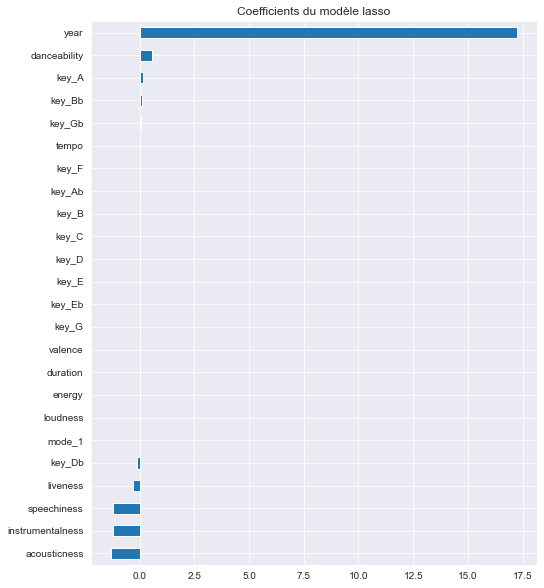

In [274]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

### Logistic regression

In [275]:
from sklearn.linear_model import LogisticRegression
ts = time.time()
method = LogisticRegression(solver='liblinear',multi_class='auto')
method.fit(Xr_train,Yb_train)
score = method.score(Xr_test, Yb_test)
ypred = method.predict(Xr_test)
te = time.time()

In [276]:
prev_on_train_set=method.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))

Score on the test set: 0.683750


In [277]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ypred,Yb_test), index = labels, columns=labels)

Score : 0.685000, time running : 0 secondes


,A,B,C,D
A,6,3,0,1
B,155,418,126,12
C,26,134,329,31
D,3,17,122,617


In [278]:
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(ypred,Yb_test, average='macro')))

F1_Score on the test set: 0.545107


#### Optimisation du modèle par pénalisation Lasso

In [279]:
# Optimisation du paramètre de pénalisation
# grille de valeurs
from sklearn.model_selection import GridSearchCV
ts = time.time()
param=[{"C":[0.5,1,5,10,12,15,30]}]
logit = GridSearchCV(LogisticRegression(penalty="l1",solver='liblinear', 
                                        multi_class='auto'), param,cv=10,n_jobs=-1)
logitOpt=logit.fit(Xr_train, Yb_train)  
# paramètre optimal
logitOpt.best_params_["C"]
te = time.time()
print("Temps : %d secondes" %(te-ts))

Temps : 13 secondes


In [280]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (logitOpt.best_score_,logitOpt.best_params_))

Meilleur score = 0.679250, Meilleur paramètre = {'C': 12}


In [281]:
yChap = logitOpt.predict(Xr_test)
logitOpt.score(Xr_test, Yb_test)

0.686

In [282]:
prev_on_train_set=logitOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))

Score on the test set: 0.684375


In [283]:
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(yChap,Yb_test)
print("Score : %f" %(score))
pd.DataFrame(confusion_matrix(yChap,Yb_test), index = labels, columns=labels)

Score : 0.686000


,A,B,C,D
A,7,3,0,1
B,154,418,126,12
C,26,133,330,31
D,3,18,121,617


In [284]:
f1_score(yChap,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(ypred,Yb_test, average='macro')))

F1_Score on the test set: 0.545107


In [285]:
# Coefficients
logitLasso=LogisticRegression(penalty="l1",C=logitOpt.best_params_['C'],
                              solver="liblinear")
logitCoef=logitLasso.fit(Xr_train,Yb_train).coef_
print(logitCoef[0])

[-0.02502622  0.          0.04030772 -0.05896507  0.06228187  0.00579721
 -0.03619392  0.00888055 -0.02189088 -0.03978547  0.06627715 -0.02090103
  0.03395856 -0.17063194  2.34579114 -0.15642364  0.18166532 -0.30255901
 -0.02549729 -0.27288203 -0.06745347 -0.00739812 -0.06170928 -0.03148187]


In [286]:
coef = pd.Series(logitCoef[0], index = X_train.columns)
print("Lasso conserve " + str(sum(coef != 0)) + 
      " variables et en supprime " +  str(sum(coef == 0)))

Lasso conserve 23 variables et en supprime 1


Text(0.5, 1.0, 'Coefficients du modèle lasso')

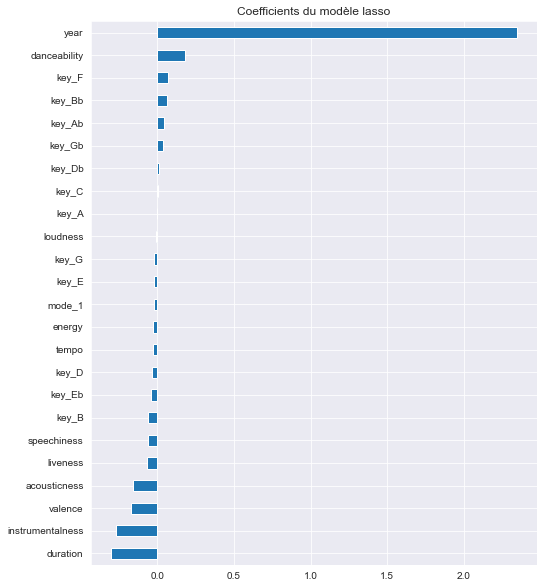

In [287]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"Coefficients du modèle lasso")

### SVM lineaire

In [288]:
from sklearn.svm import LinearSVC
ts = time.time()
method = LinearSVC(max_iter=20000)
method.fit(Xr_train,Yb_train)
score = method.score(Xr_test, Yb_test)
ypred = method.predict(Xr_test)
te = time.time()
t_total = te-ts

In [289]:
labels=['A','B','C','D']

In [290]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(ypred,Yb_test), index = labels, columns=labels)

Score : 0.670500, time running : 18 secondes


,A,B,C,D
A,1,0,0,0
B,160,433,142,13
C,26,114,290,31
D,3,25,145,617


In [291]:
from sklearn.svm import SVC
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(LinearSVC(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Yb_train)
# paramètre optimal

In [292]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.664500, Meilleur paramètre = {'C': 0.8}


In [293]:
# prévision de l'échantillon test
y_chap = svmOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,1,0,0,0
B,160,433,141,13
C,26,114,291,31
D,3,25,145,617


In [294]:
prev_on_train_set=svmOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))

Score on the test set: 0.667250


In [295]:
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(y_chap,Yb_test)
print("Score : %f" %(score))

Score : 0.671000


In [296]:
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

F1_Score on the test set: 0.519408


### SVM avec noyau gaussien

In [297]:
from sklearn.svm import SVC
ts = time.time()
method = SVC(gamma='auto')
method.fit(Xr_train,Yb_train)
score = method.score(Xr_test, Yb_test)
ypred = method.predict(Xr_test)
te = time.time()

In [298]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix( ypred,Yb_test), index = labels, columns=labels)

Score : 0.701000, time running : 3 secondes


,A,B,C,D
A,6,4,0,0
B,156,395,99,13
C,26,159,407,54
D,2,14,71,594


In [299]:
print("accuracy_score without optim = "+str(accuracy_score( ypred,Yb_test)))

accuracy_score without optim = 0.701


In [300]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param=[{"C":[0.4,0.5,0.6,0.8,1,1.4]}]
svm= GridSearchCV(SVC(),param,cv=10,n_jobs=-1)
svmOpt=svm.fit(Xr_train, Yb_train)
# paramètre optimal


In [301]:
print("Meilleur score = %f, Meilleur paramètre = %s" % (svmOpt.best_score_,svmOpt.best_params_))

Meilleur score = 0.694125, Meilleur paramètre = {'C': 1.4}


In [302]:
# prévision de l'échantillon test
y_chap = svmOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,18,8,0,0
B,143,388,99,13
C,27,163,409,57
D,2,13,69,591


In [303]:
prev_on_train_set=svmOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))

Score on the test set: 0.742375


In [304]:
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(y_chap,Yb_test)
print("Score : %f" %(score))

Score : 0.703000


In [305]:
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

F1_Score on the test set: 0.588376


### Analyse discriminante linéaire

In [306]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
method = LinearDiscriminantAnalysis() 
lda = method.fit(Xr_train, Yb_train)
X_r2 = lda.transform(Xr_train)

In [307]:
X_r2.shape

(8000, 3)

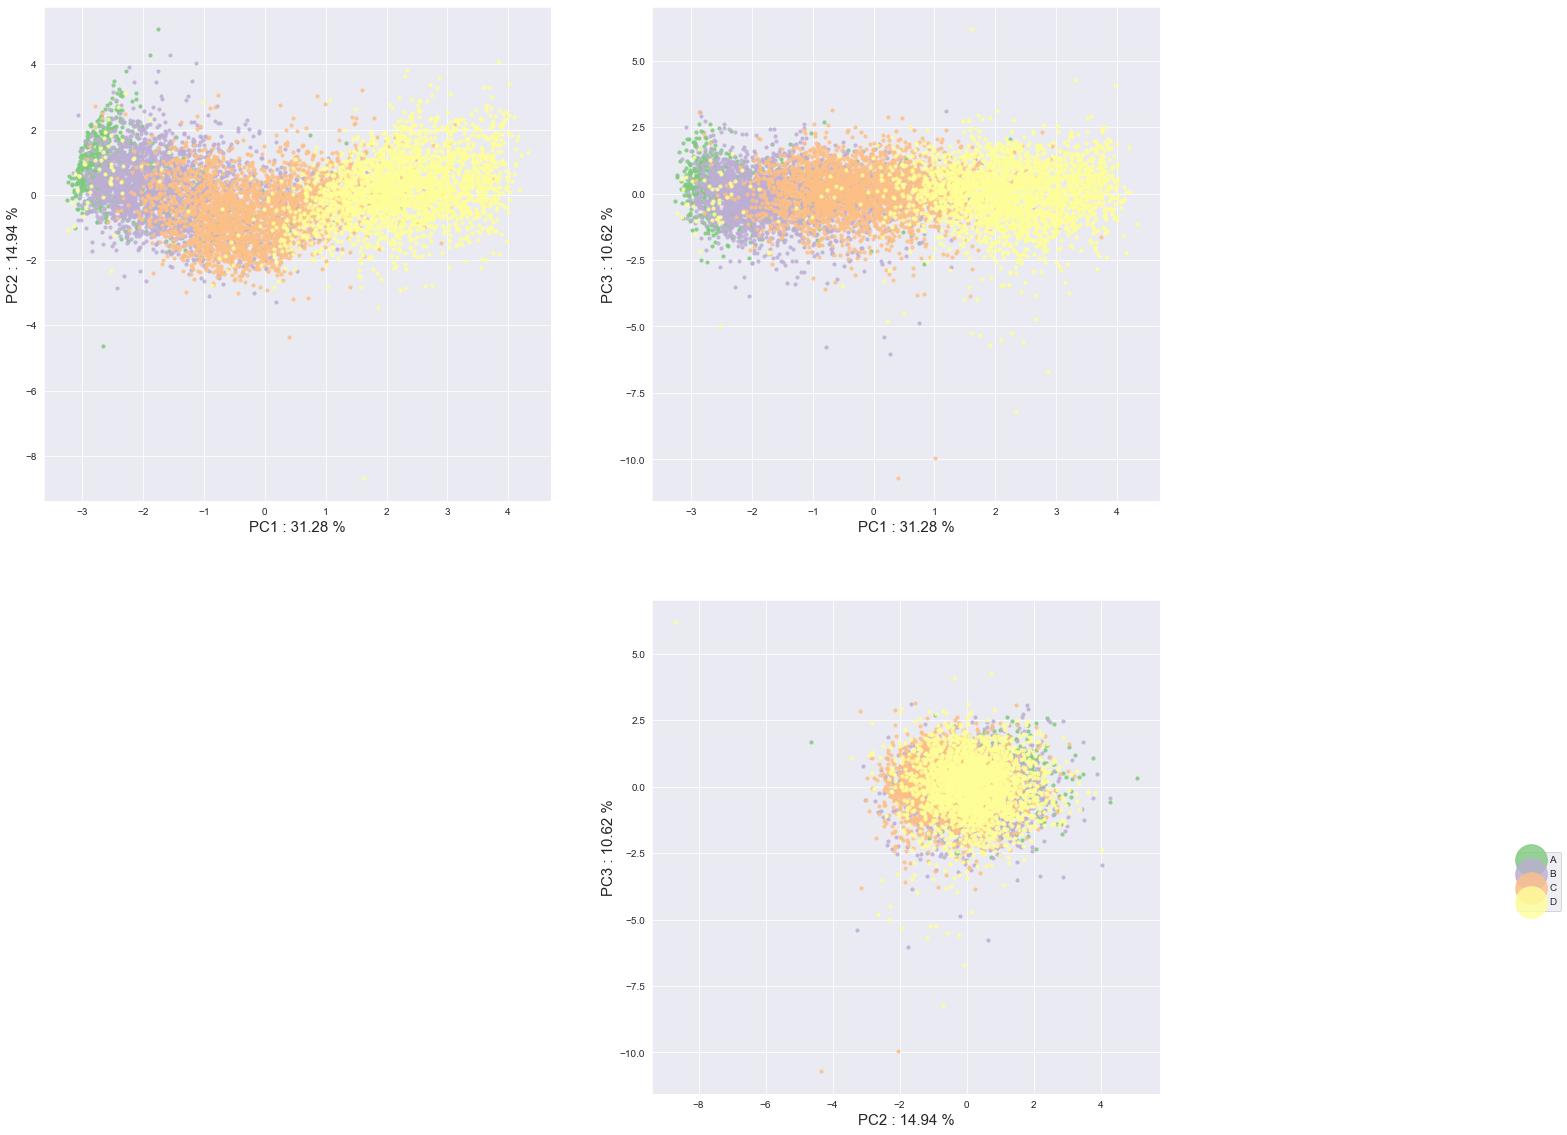

In [308]:
fig = plt.figure(figsize= (20, 20))
count = 0
for nbc, nbc2,count in [(1, 2, 1), (1, 3, 2), (2, 3, 4)] :
    ax = fig.add_subplot(2, 2, count)
    plot_pca(X_r2, Yb_train, fig, ax, nbc, nbc2)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.8, 0.5), markerscale = 10)
plt.show()

In [309]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
ts = time.time()
method = LinearDiscriminantAnalysis()
method.fit(Xr_train,Yb_train)
score = method.score(Xr_test, Yb_test)
ypred = method.predict(Xr_test)
te = time.time()
score

0.7025

In [310]:
print("Score : %f, time running : %d secondes" %(score, te-ts))
pd.DataFrame(confusion_matrix(Yb_test, ypred), index = labels, columns=labels)

Score : 0.702500, time running : 0 secondes


,A,B,C,D
A,46,118,23,3
B,28,395,136,13
C,0,115,382,80
D,4,8,67,582


### Decision Tree

In [311]:
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (treeOpt.best_score_,treeOpt.best_params_))

Meilleur score = 0.737125, Meilleur paramètre = {'max_depth': 3}


In [312]:
treeOpt.score(Xr_test,Yb_test)

0.7425

In [313]:
# prévision de l'échantillon test
y_chap = treeOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,68,14,0,7
B,90,356,57,5
C,30,192,457,45
D,2,10,63,604


In [314]:
prev_on_train_set=treeOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))


Score on the test set: 0.738250


In [315]:
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(y_chap,Yb_test)
print("Score : %f" %(score))

Score : 0.742500


In [316]:
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

F1_Score on the test set: 0.687686


In [317]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [318]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus
treeG=DecisionTreeClassifier(max_depth=treeOpt.best_params_['max_depth'])
treeG.fit(Xr_train,Yb_train)
dot_data = StringIO() 
export_graphviz(treeG, out_file=dot_data) 
graph=pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png("treeOpt.png")  

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
from IPython.display import Image
Image(filename='treeOpt.png')

### Random forest

In [319]:
from sklearn.ensemble import RandomForestClassifier 
# définition des paramètres
forest = RandomForestClassifier(n_estimators=500, 
   criterion='gini', max_depth=None,
   min_samples_split=2, min_samples_leaf=1, 
   max_features='auto', max_leaf_nodes=None,
   bootstrap=True, oob_score=True)
# apprentissage
rfFit = forest.fit(Xr_train,Yb_train)
print(1-rfFit.oob_score_)

0.27075000000000005


In [320]:
# erreur de prévision sur le test
1-rfFit.score(Xr_test,Yb_test)

0.262

In [321]:
y_chap = rfFit.predict(Xr_test)
from sklearn.metrics import confusion_matrix, accuracy_score
score=accuracy_score(y_chap,Yb_test)
print("Score : %f" %(score))

Score : 0.738000


In [322]:
param=[{"max_features":list(range(2,10,1))}]
rf= GridSearchCV(RandomForestClassifier(n_estimators=100),
        param,cv=5,n_jobs=-1)
rfOpt=rf.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

Meilleur score = 0.267375, Meilleur paramètre = {'max_features': 8}


In [323]:
# prévision
y_chap = rfOpt.predict(Xr_test)
# matrice de confusion
table=pd.crosstab(y_chap,Yb_test)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,75,23,0,6
B,87,378,90,5
C,26,161,431,50
D,2,10,56,600


In [324]:
score=accuracy_score(y_chap,Yb_test)
print("Score : %f" %(score))

Score : 0.742000


In [325]:
prev_on_train_set=rfOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the test set: %f" %(score_on_train_set))
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

Score on the test set: 0.999875
F1_Score on the test set: 0.693338


In [326]:
rf= RandomForestClassifier(n_estimators=100,max_features=2)
rfFit=rf.fit(Xr_train, Yb_train)
# Importance décroissante des variables
importances = rfFit.feature_importances_
indices = np.argsort(importances)[::-1]
indice=[]
value=[]
for f in range(Xr_train.shape[1]):
    indice=indice+[dfC.columns[indices[f]]]
    value=value+[importances[indices[f]]]
    #print(dfC.columns[indices[f]], importances[indices[f]])

Text(0.5, 1.0, 'The importance of each variable of the RandomForest model ')

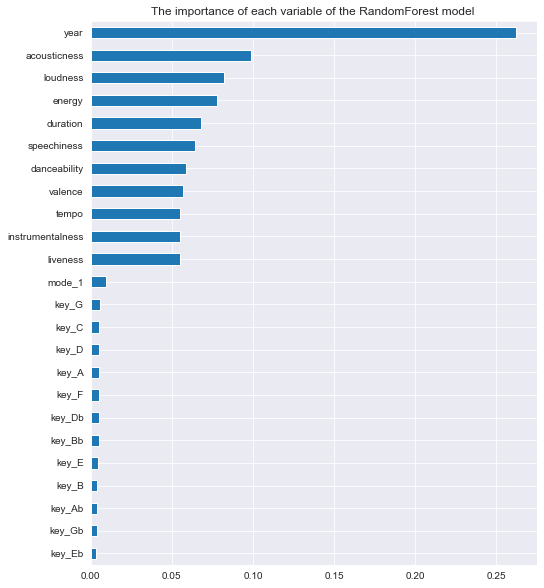

In [327]:
coef = pd.Series(value, index =indice)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(u"The importance of each variable of the RandomForest model ")

### Réseau de neurones


#### MLPClassifier

In [328]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,r2_score

In [329]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPClassifier(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, Yb_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnetOpt.best_score_,nnetOpt.best_params_))

Meilleur score = 0.272250, Meilleur paramètre = {'hidden_layer_sizes': (5,)}


In [330]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
accuracy_score(y_chap,Yb_test)
print("Score on the test set: " +str(accuracy_score(y_chap,Yb_test)))

Score on the test set: 0.7325


In [331]:
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,62,22,0,3
B,101,380,89,9
C,25,157,427,53
D,2,13,61,596


In [332]:
prev_on_train_set=nnetOpt.predict(Xr_train)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the train set: %f" %(score_on_train_set))
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

Score on the train set: 0.732500
F1_Score on the test set: 0.672859


#### MLPRegressor

In [333]:
from sklearn.neural_network import MLPRegressor

In [334]:
param_grid=[{"hidden_layer_sizes":list([(5,),(6,),(7,),(8,)])}]
nnet= GridSearchCV(MLPRegressor(max_iter=500),param_grid,cv=10,n_jobs=-1)
nnetOpt=nnet.fit(Xr_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (nnetOpt.best_score_,nnetOpt.best_params_))


Meilleur score = 0.760159, Meilleur paramètre = {'hidden_layer_sizes': (5,)}


In [335]:
1-nnetOpt.score(Xr_test,Yr_test)

0.24994851906690785

In [336]:
# prévision de l'échantillon test
y_chap = nnetOpt.predict(Xr_test)
classfunction(y_chap)
pd.DataFrame(confusion_matrix(y_chap,Yb_test), index = labels, columns=labels)

,A,B,C,D
A,44,13,0,2
B,126,423,149,10
C,19,128,377,88
D,1,8,51,561


In [337]:
accuracy_score(y_chap,Yb_test)

0.7025

In [338]:
prev_on_train_set=nnetOpt.predict(Xr_train)
classfunction(prev_on_train_set)
score_on_train_set=accuracy_score(prev_on_train_set,Yb_train)
print("Score on the train set: %f" %(score_on_train_set))
f1_score(prev,Yb_test, average='macro')
print("F1_Score on the test set: %f" %(f1_score(y_chap,Yb_test, average='macro')))

Score on the train set: 0.706750
F1_Score on the test set: 0.630923
